In [4]:
import bittensor
import torch 
from transformers import AutoTokenizer,AutoModel,AutoConfig
import numpy as np
from miners.text.server.server_gpt2 import server

ModuleNotFoundError: No module named 'miners.text.server.server_gpt2'

In [16]:
Config = AutoConfig.from_pretrained('bert-base-uncased')
model =  AutoModel.from_config(Config)

In [19]:
Config.vocab_size=bittensor.__vocab_size__

Config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.8.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 50378
}

In [10]:
logging=bittensor.logging(debug=True)
dataload = bittensor.dataloader(max_corpus_size=10000)

2021-09-27 12:15:32.053 |     SUCCESS      | Set debug:          ON
2021-09-27 12:15:32.057 |     SUCCESS      | Set trace:          OFF
2021-09-27 12:15:32.057 |     SUCCESS      | Set record log:     OFF


In [14]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokenizer = bittensor.tokenizer.prep_tokenizer(tokenizer)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [4]:
from transformers import RobertaConfig, RobertaModel
configuration = RobertaConfig()
print(configuration)

model = RobertaModel.from_pretrained('roberta-base')

RobertaConfig {
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.8.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F
import numpy as np
for epoch in np.arange(1):
    print('New Epoch',epoch)
    for test in dataload.dataloader(epoch_length=1):
        #decoded = [bittensor.tokenizer().decode(i) for i in test[0]]

        new_data = remapping(test,bittensor.tokenizer(),tokenizer)
        print(test.size())
        print(new_data.size())
        rep = model(new_data)
        print(rep.last_hidden_state.shape)
        down= F.interpolate(rep.last_hidden_state.unsqueeze(1),size=[20,768],mode='bilinear')
        collect = np.zeros((20,22))
        for i in range(20):
            for j in range(22):
                collect[i,j] = F.mse_loss(down[:,0,i,:],rep.last_hidden_state[:,j,:]).item()

    #print(model(test[j]))
print(collect)


New Epoch 0
torch.Size([10, 20])
torch.Size([10, 23])
torch.Size([10, 23, 768])
[[4.90156794e-03 7.45583236e-01 8.49807382e-01 8.13194871e-01
  8.32298279e-01 8.62561882e-01 7.99810767e-01 8.51298153e-01
  8.71891558e-01 7.90471494e-01 8.74624789e-01 8.54153752e-01
  8.73166382e-01 8.94730031e-01 8.05655062e-01 8.76586735e-01
  8.39517295e-01 8.61511588e-01 8.79324377e-01 8.05350065e-01
  7.92445481e-01 7.28426635e-01]
 [7.18522310e-01 4.68406528e-02 5.55727303e-01 7.50683367e-01
  8.03008974e-01 7.40701854e-01 7.53103137e-01 7.81263411e-01
  7.58184552e-01 7.39218950e-01 7.77169466e-01 8.19601357e-01
  7.44507372e-01 7.75144398e-01 7.32451081e-01 7.62196422e-01
  7.79491365e-01 7.73935735e-01 8.09823036e-01 7.66353846e-01
  7.14990556e-01 6.94091439e-01]
 [6.82936847e-01 7.09711492e-01 1.26951262e-01 3.52642417e-01
  7.19457984e-01 6.94990695e-01 7.19207466e-01 7.10464895e-01
  7.34698713e-01 6.84679329e-01 7.21040606e-01 7.49381065e-01
  7.04908729e-01 6.88450873e-01 6.82036817e-01 7

/home/athrunxyz/.bittensor/env/lib/python3.8/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [148]:
pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 292 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 35.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


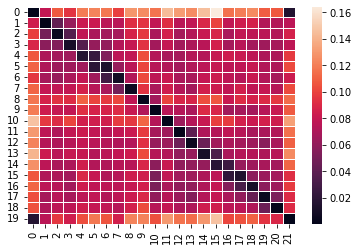

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(collect, linewidth=0.5)
plt.show()

In [12]:
class server(torch.nn.Module):
    def __init__(self, pretrained,pre_dimension,final_dim ):
        super(server, self).__init__()
        self.pretrained = pretrained
        self.final_dim =  final_dim
        self.pre_dimension = pre_dimension
        self.mapping = torch.nn.Linear( pre_dimension, final_dim)
        self.decoder = torch.nn.Linear( final_dim, bittensor.__vocab_size__ , bias=False)
        self.loss_fct = torch.nn.CrossEntropyLoss()
        
    def forward(self, inputs,target):
        pre_hidden = self.pretrained(inputs).last_hidden_state
        down= F.interpolate(pre_hidden.unsqueeze(1),size=[20,768])
        padding_l = (self.final_dim-self.pre_dimension)//2
        padding_r = (self.final_dim-self.pre_dimension) - padding_l
        encoded_hidden = F.pad(down.squeeze(1), (padding_l, padding_r),  "constant", 0)
        #encoded_hidden = self.mapping(down.squeeze(1).detach())
        decoded_targets = self.decoder(encoded_hidden)
        
        shift_logits = decoded_targets[..., :-1, :].contiguous()
        shift_labels = target[..., 1:].contiguous()     
        loss = self.loss_fct( shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1) ) 
        return loss, decoded_targets
    
    def encode_forward(self,inputs):
        pre_hidden = self.pretrained(inputs).last_hidden_state
        padding_l = (self.final_dim-self.pre_dimension)//2
        padding_r = (self.final_dim-self.pre_dimension) - padding_l
        encoded_hidden = F.pad(pre_hidden, (padding_l, padding_r),  "constant", 0)
        return encoded_hidden

def remapping(input, old_token,new_token):
    new_data = []
    for i in range(input.shape[0]):
        decoded = old_token.decode(input[i]) 
        hugging = new_token(decoded)
        new_data += [torch.LongTensor(hugging.input_ids)]
    new_data = pad_sequence(new_data,batch_first=True)
    return new_data



In [17]:
print(model.config)
dimension = model.config.hidden_size
bit_dim =  bittensor.__network_dim__
gp_server = server(model,dimension,bit_dim)

RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.8.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}



In [18]:
optimizer = torch.optim.SGD(
    [ {"params": gp_server.parameters()} ],
    lr = 0.05,
    momentum = 0.9,
)
scheduler= torch.optim.lr_scheduler.StepLR(optimizer,
    step_size= 1.0,
    gamma=0.95
)

In [19]:
from torch.nn.utils import clip_grad_norm_
for k in range(5):
    print("epoch:",k)
    epoch_loss = 0
    epoch_batches = dataload.dataloader(epoch_length=100)
    for iteration, inputs in enumerate(epoch_batches):
        optimizer.zero_grad()
        new_data = remapping(inputs,bittensor.tokenizer(),tokenizer)
        loss, _ = gp_server( new_data,inputs )
        loss.backward()
        clip_grad_norm_(gp_server.parameters(), 1.0)
        optimizer.step()
        epoch_loss += loss.item()
        if iteration % 10 == 1:
            print(loss.item())
    print(loss)
    print(epoch_loss/100)
    print(optimizer.param_groups[0]['lr'])

epoch: 0
2021-09-21 09:00:03.623 |     SUCCESS      | Retrieving a dataset files from the IPFS gateway...
2021-09-21 09:00:04.094 |     SUCCESS      | Loaded folder:      QmXwfPoh2QFYqC6cYcW8kzyd9ruFfhnUi2kVBkdhawjUzj
2021-09-21 09:00:06.526 |     SUCCESS      | Loaded folder:      QmRjFNn3XpYMycVzTE4YcVcxk45vNZcTAjKmtEqPLKwAWd
2021-09-21 09:00:06.929 |     SUCCESS      | Downloaded:         Wikitext_Bandedsugarant.txt
2021-09-21 09:00:06.930 |     SUCCESS      | Saved:              Wikitext_Bandedsugarant.txt
10.826314926147461
8.877348899841309
7.353959560394287
7.038410186767578
6.644811153411865
6.9440083503723145
6.314007759094238
5.95612907409668
6.092041015625


KeyboardInterrupt: 